In [15]:
import matplotlib.pyplot as plt
import io
from PIL import Image
from google.cloud import storage
import sys
import os

# Get the parent directory of the current notebook directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)



def download_blob_into_memory(bucket_name, blob_name):

    """Downloads a blob into memory."""

    # The ID of your GCS bucket

    # bucket_name = "your-bucket-name"


    # The ID of your GCS object

    # blob_name = "storage-object-name"


    storage_client = storage.Client()


    bucket = storage_client.bucket(bucket_name)


    # Construct a client side representation of a blob.

    # Note `Bucket.blob` differs from `Bucket.get_blob` as it doesn't retrieve

    # any content from Google Cloud Storage. As we don't need additional data,

    # using `Bucket.blob` is preferred here.

    blob = bucket.blob(blob_name)

    print(

        f"Downloaded storage object {blob_name} from bucket {bucket_name}."

    )

    return blob.download_as_bytes()

In [16]:
import os

# Get the current working directory
current_dir = os.getcwd()
print(current_dir)

e:\SUTD\Capstone\kagame-backend\test_files


In [17]:
from google.cloud import storage
from google.auth import load_credentials_from_file
from secretstuff.secret import SERVICE_ACCOUNT_JSON_PATH

credentials, project = load_credentials_from_file("../" + SERVICE_ACCOUNT_JSON_PATH)
storage_client = storage.Client(credentials=credentials, project=project)
bucket = storage_client.bucket("kagame_bucket_1")

In [18]:
import datetime

print(bucket.blob("test").exists())
print(bucket.blob("test").generate_signed_url(expiration=datetime.timedelta(seconds=5), method='GET'))

True
https://storage.googleapis.com/kagame_bucket_1/test?Expires=1727855331&GoogleAccessId=default-621%40kagame-432309.iam.gserviceaccount.com&Signature=At%2FTveVVlX0tex5uVrLWYJZY%2BFbGzPVtTtStD2TbPzrYunEEZgsOhR7sXRnaYU%2FKtKyuTqFFGG6%2F4dzUEhnxpIvsxdTyXmi8SdpKMre714spyC4XylJLB7SSjXPnF871pV0exuNZ3rNzrAd8wf5hI48PFoJVmt%2BIpc2nGNo%2BnSIccUDhaiA%2FLxumKjCr21ZRKdQLHZ1UQj2QR%2ByXoVCdvyoJG6rOLdpuBhLOvw0ZWzDCZAYaSZJ%2F5Egg4igSyjR8XfwZ2MHFREVdTNQ3OH7iyCXRHZQnxzbxdf%2Bpm19k8K3rCS1aKKS4ZXDu9%2FSnusuTvRjl3Chc2rzC9l29%2BTD0mQ%3D%3D


Downloaded storage object test1 from bucket kagame_bucket_1.


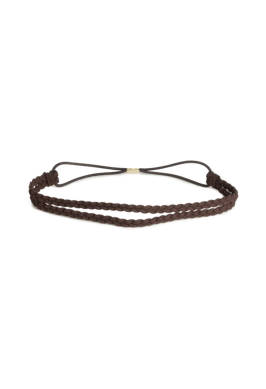

In [19]:
image_bytes = download_blob_into_memory("kagame_bucket_1", "test1")
# Convert the bytes into a stream and open it as an image
image = Image.open(io.BytesIO(image_bytes))
# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide the axes for a cleaner look
plt.show()